In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
titanic_df = pd.read_csv("titanic.csv")
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
# You can also drop whichever other columns you'd like here
titanic_df.drop("Cabin", axis=1, inplace=True)

### One-Hot Encoding
One-hot encoding is a technique used to ensure that categorical variables are better represented in the machine. Let's take a look at the "Sex" column

In [5]:
titanic_df["Sex"].unique()

array(['male', 'female'], dtype=object)

Machine Learning classifiers don't know how to handle strings. As a result, you need to convert it into a categorical representation. There are two main ways to go about this:

Label Encoding: Assigning, for example, 0 for "male" and 1 for "female". The problem here is it intrinsically makes one category "larger than" the other category.

One-hot encoding: Assigning, for example, [1, 0] for "male" and [0, 1] for female. In this case, you have an array of size (n_categories,) and you represent a 1 in the correct index, and 0 elsewhere. In Pandas, this would show as extra columns. For example, rather than having a "Sex" column, it would be a "Sex_male" and "Sex_female" column. Then, if the person is male, it would simply show as a 1 in the "Sex_male" column and a 0 in the "Sex_female" column.

There is a nice and easy method that does this in pandas: get_dummies()

In [6]:
titanic_df = pd.get_dummies(titanic_df, prefix="Sex", columns=["Sex"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Embarked,Sex_female,Sex_male
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,S,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C,True,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,S,True,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,S,True,False
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,S,False,True


Now, we do the same to the "Embarked" column.

In [7]:
titanic_df = pd.get_dummies(titanic_df, prefix="Embarked", columns=["Embarked"])
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,False,True,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,True,False,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,True,False,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,True,False,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,False,True,False,False,True


In [8]:
# Handle missing values
titanic_df["Age"].fillna(titanic_df["Age"].median(), inplace=True)
titanic_df["Embarked_C"].fillna(0, inplace=True)
titanic_df["Embarked_Q"].fillna(0, inplace=True)
titanic_df["Embarked_S"].fillna(0, inplace=True)

/var/folders/8p/2521p8416vx3k_n1vjjv118r0000gp/T/ipykernel_11603/596793631.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df["Age"].fillna(titanic_df["Age"].median(), inplace=True)
/var/folders/8p/2521p8416vx3k_n1vjjv118r0000gp/T/ipykernel_11603/596793631.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are set

In [9]:
# Drop any remaining missing values in other columns
titanic_df.dropna(inplace=True)

In [10]:
# Define features (X) and target (y)
X = titanic_df.drop(columns=["PassengerId", "Name", "Ticket", "Survived"])
y = titanic_df["Survived"]

In [11]:
# Split the data into training, development, and test sets (60%, 20%, 20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_dev, X_test, y_dev, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [12]:
# Train a decision tree classifier without depth restriction
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

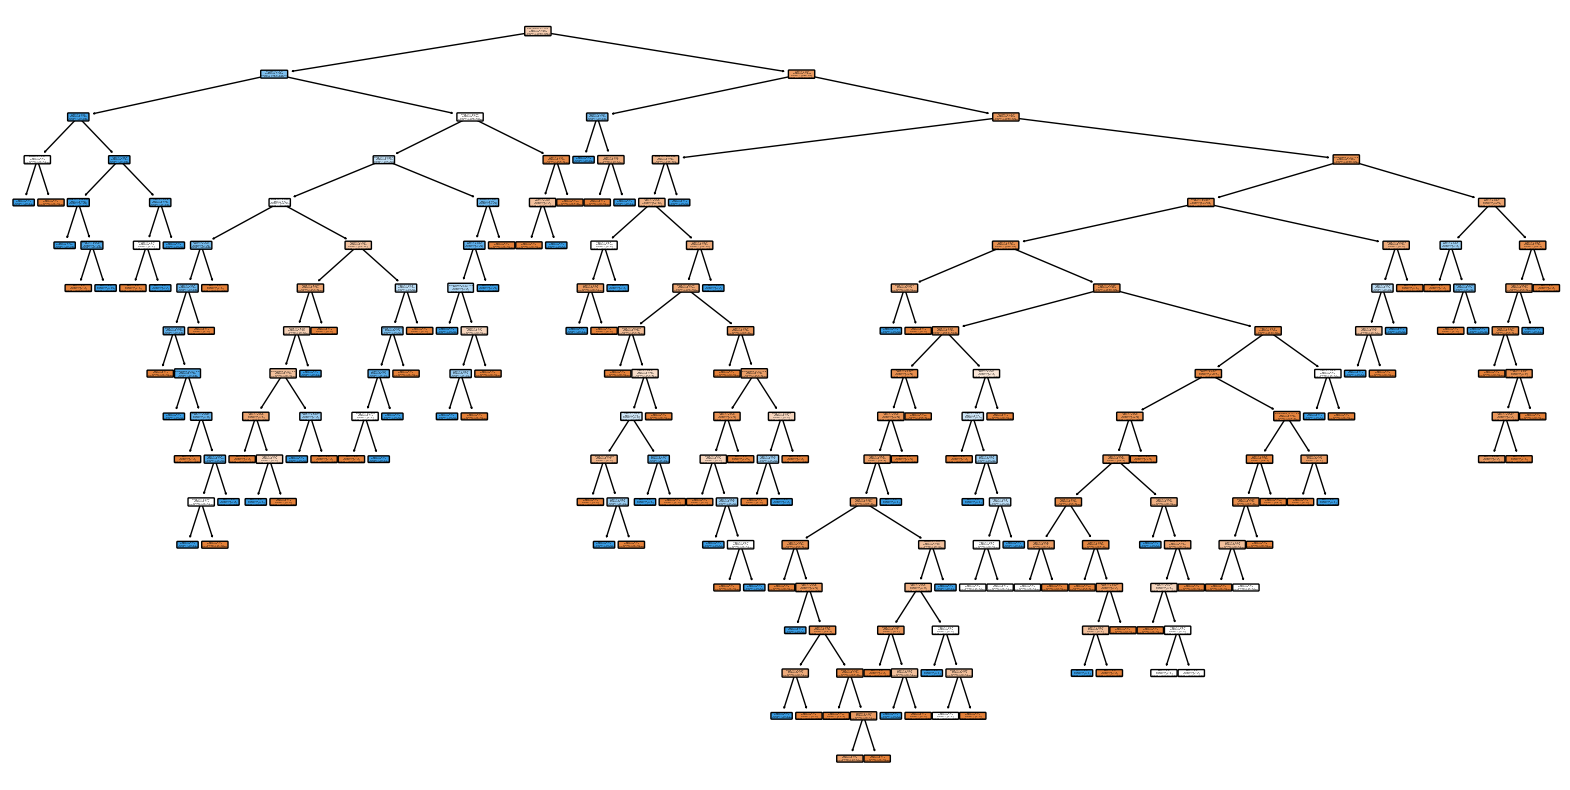

In [13]:
# Plot the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"], rounded=True)
plt.show()

In [14]:
# Evaluate the model on the development set
y_dev_pred = clf.predict(X_dev)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
print(f"Accuracy on the development set (no max_depth): {dev_accuracy}")

Accuracy on the development set (no max_depth): 0.6797752808988764


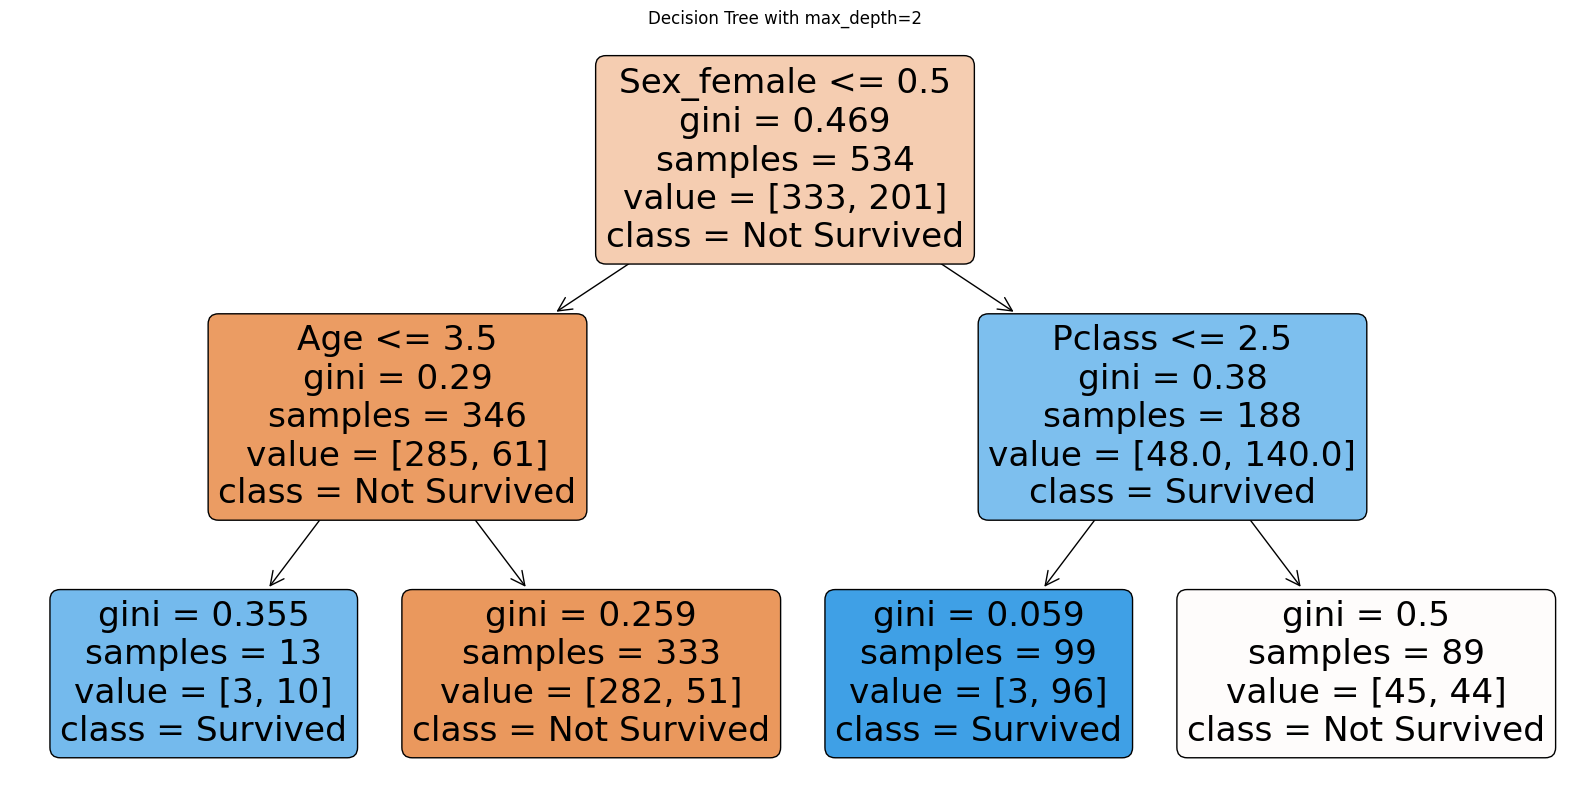

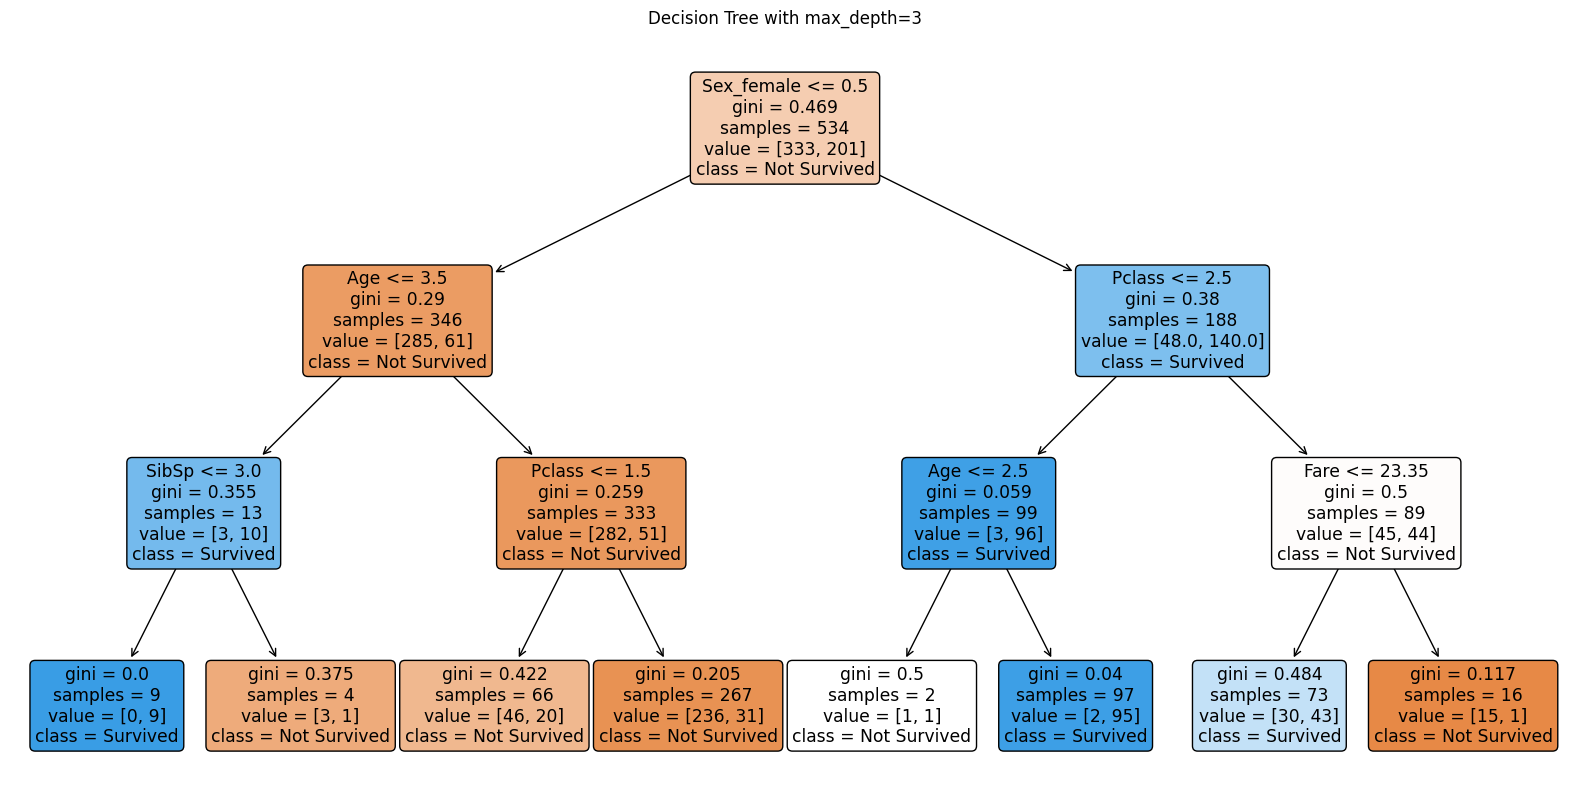

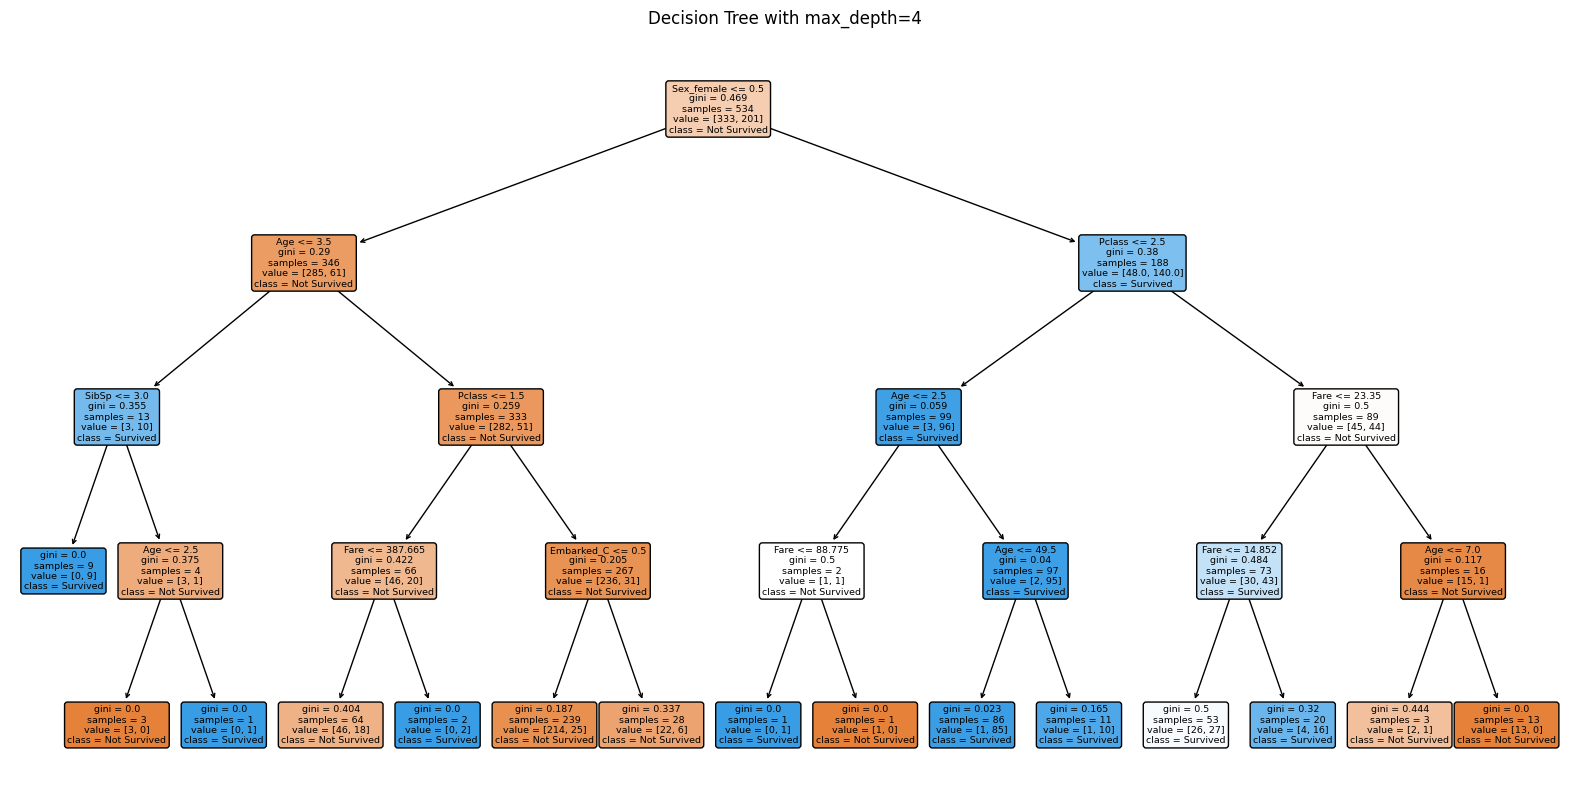

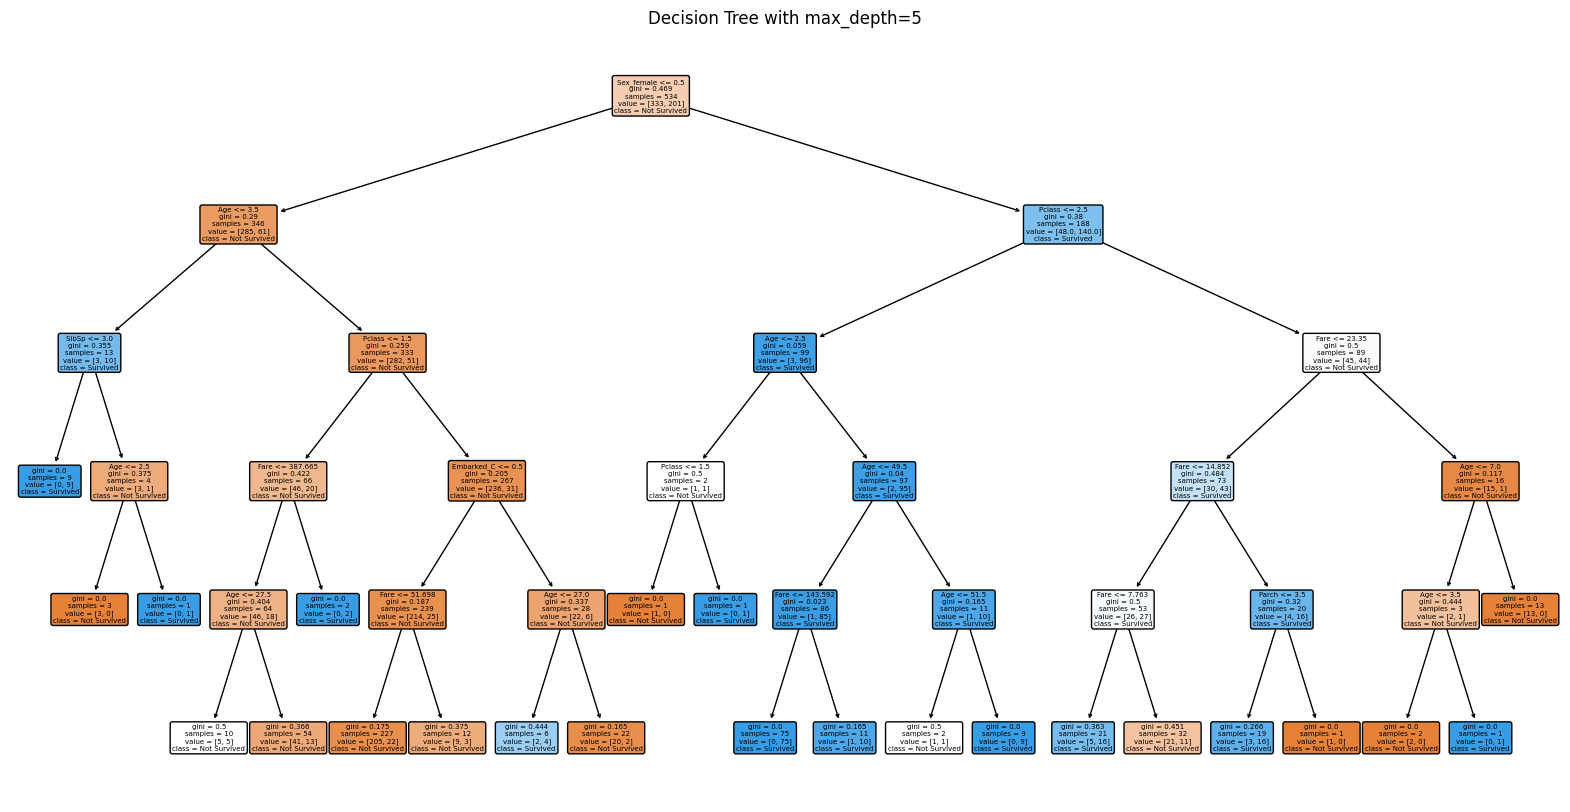

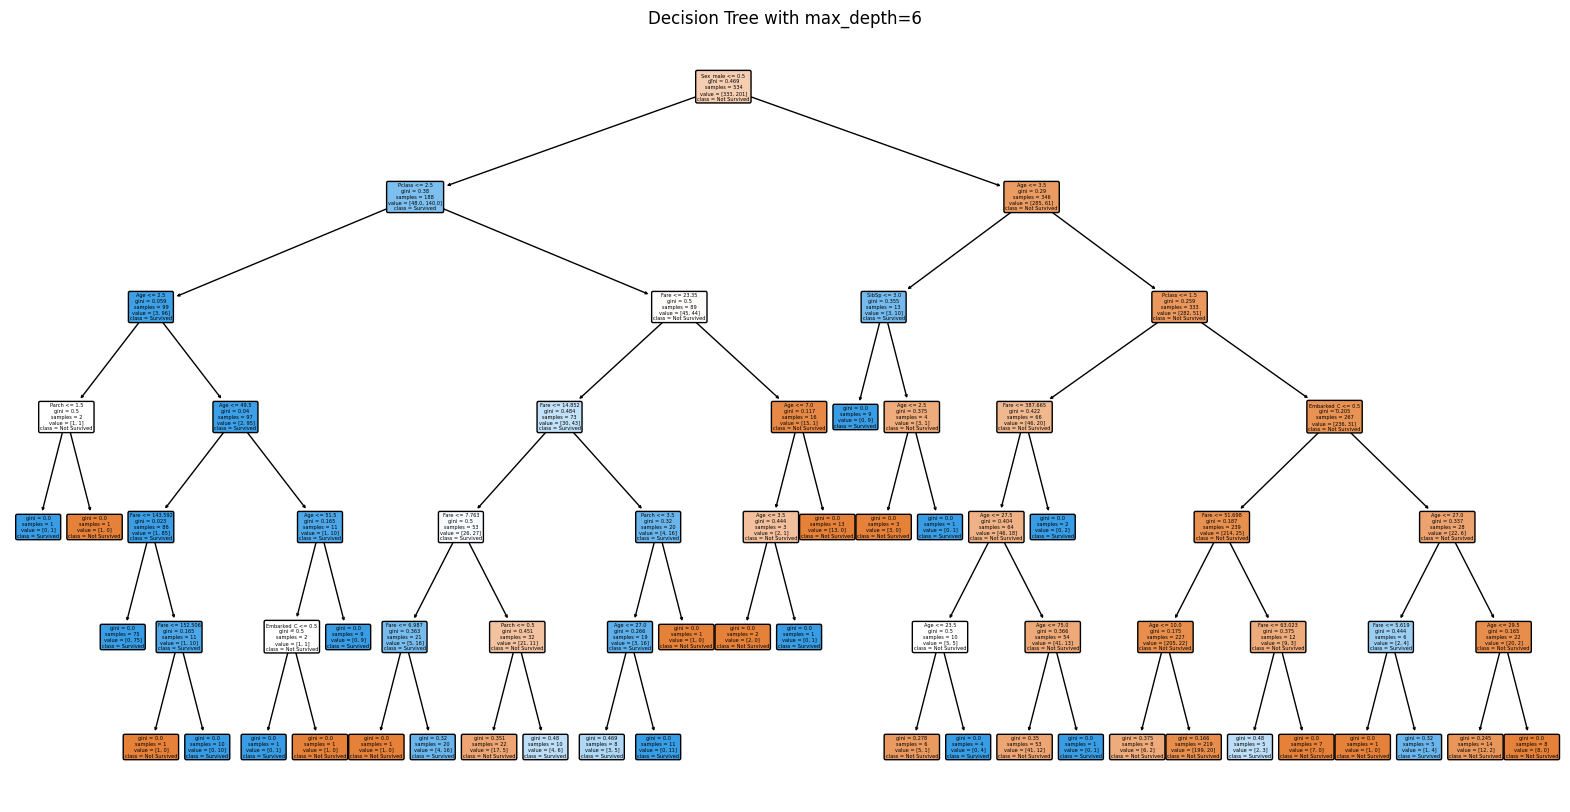

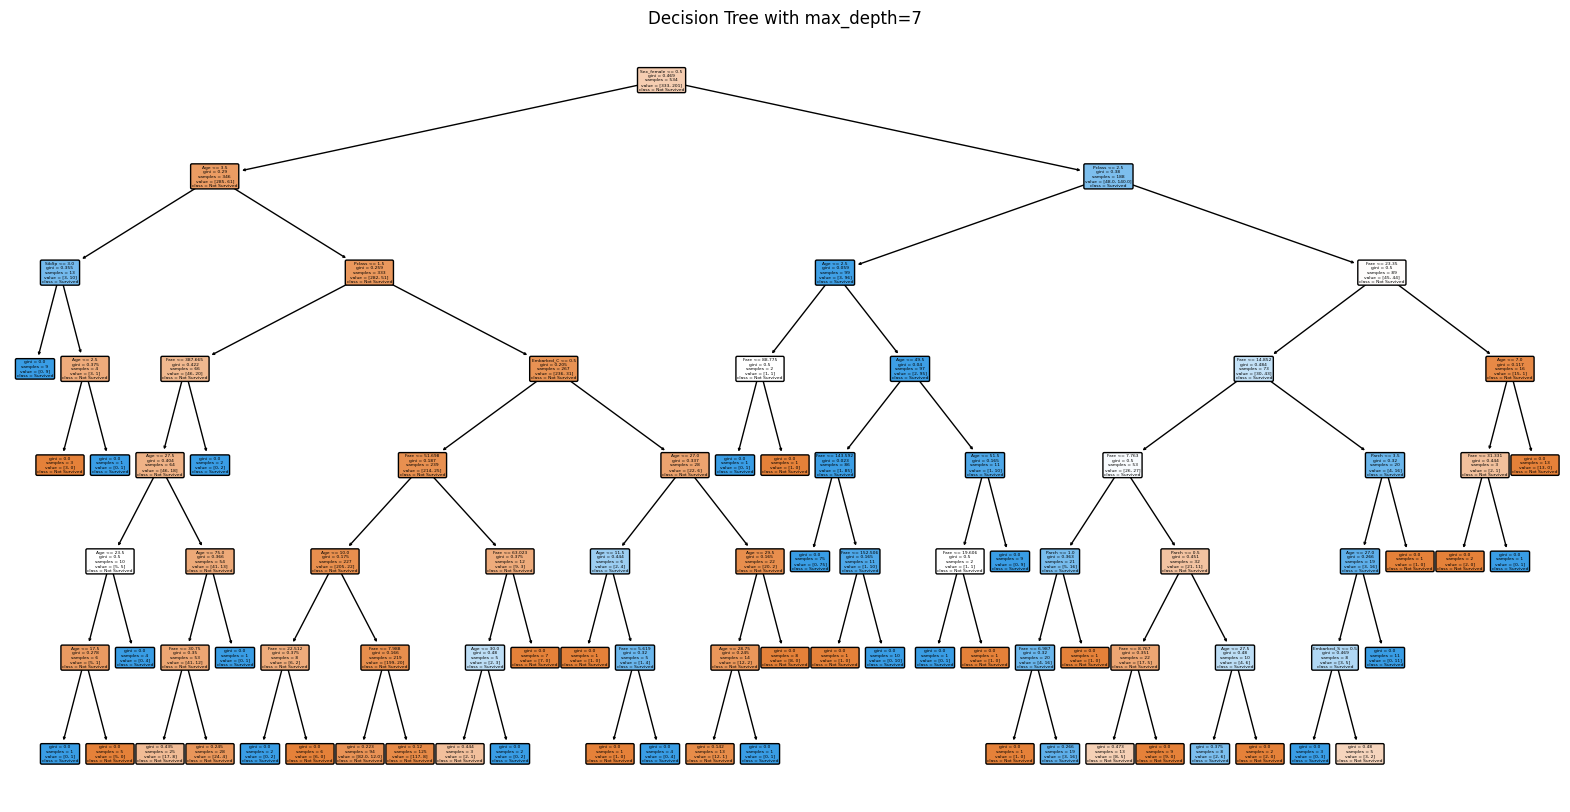

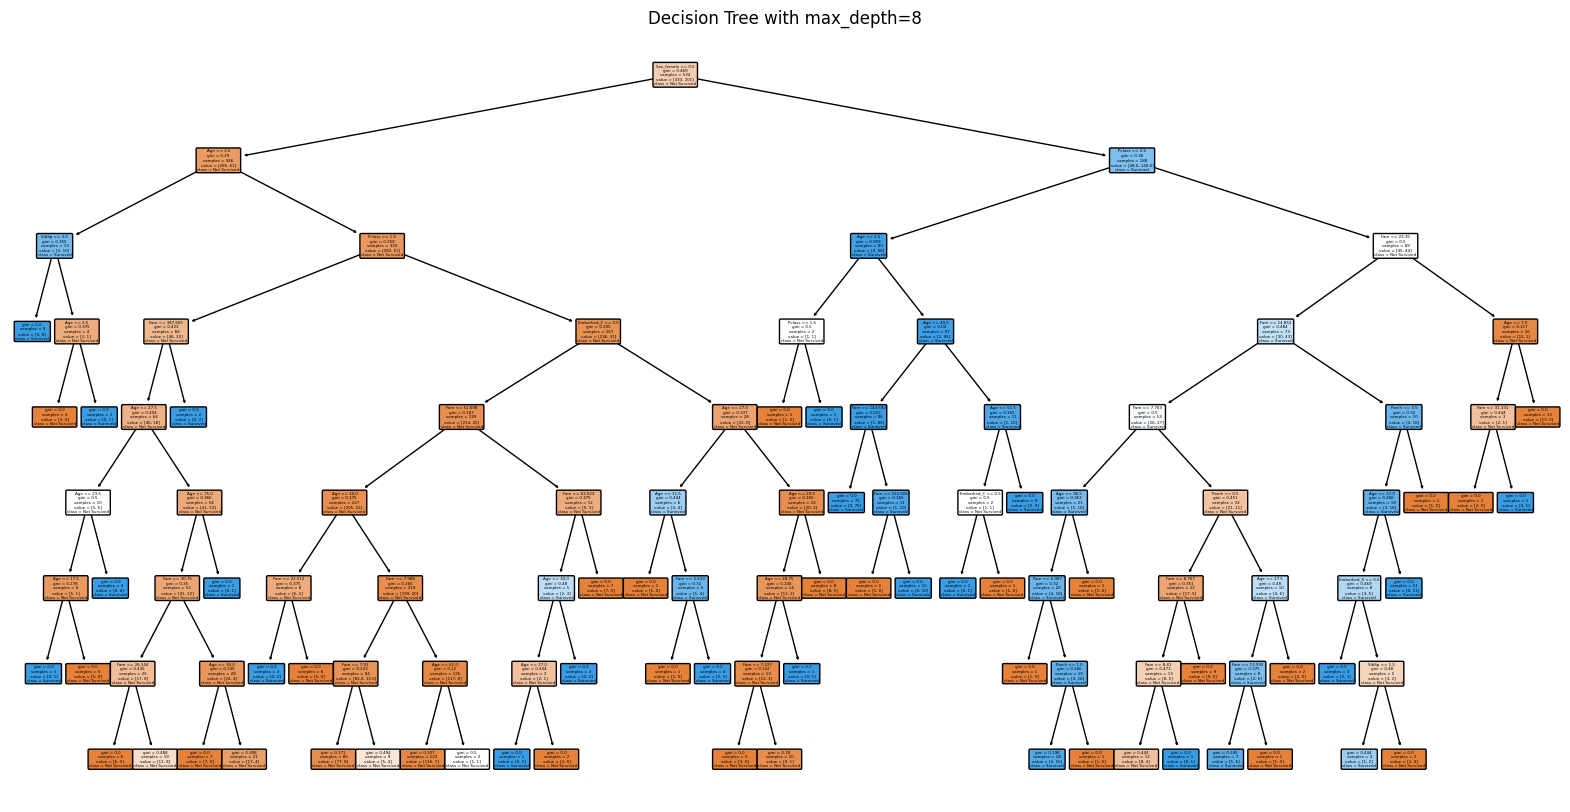

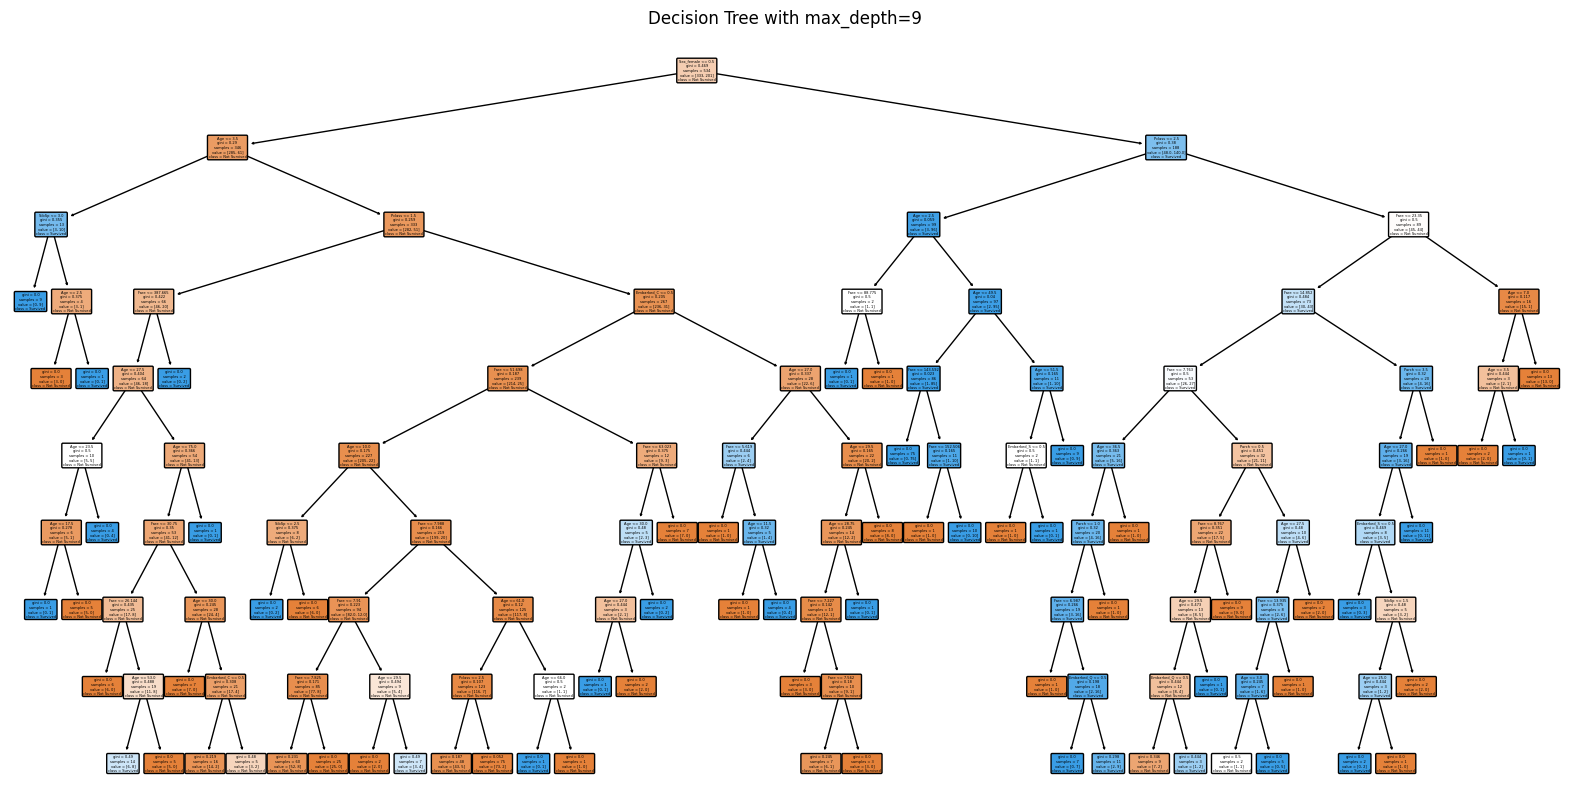

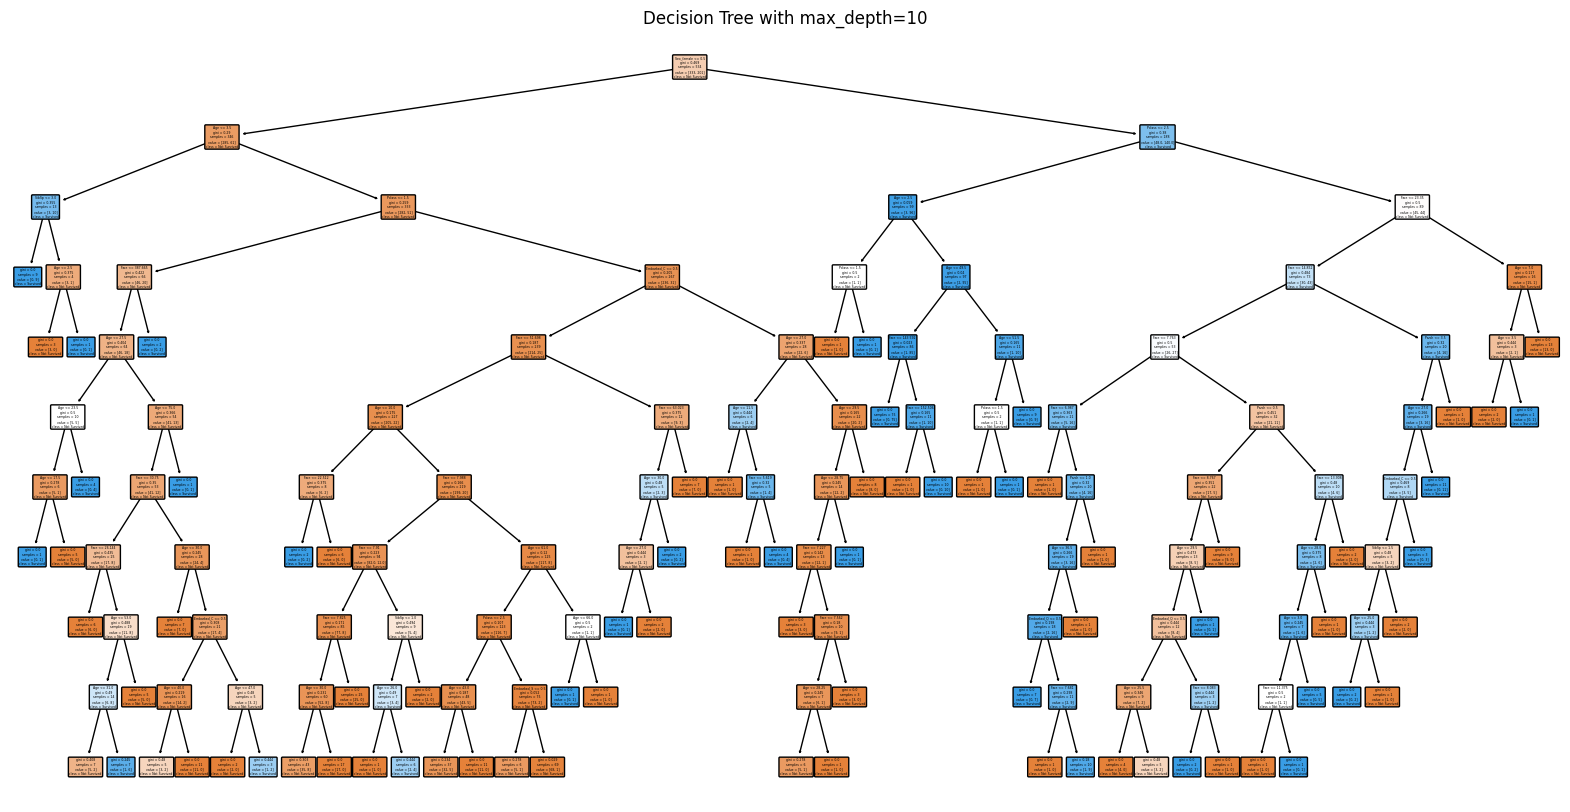

In [15]:
# Train decision tree models with different max_depth values and plot their accuracies
train_accuracies = []
dev_accuracies = []

for max_depth in range(2, 11):
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    
    y_train_pred = clf.predict(X_train)
    y_dev_pred = clf.predict(X_dev)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)
    
    train_accuracies.append(train_accuracy)
    dev_accuracies.append(dev_accuracy)
    
    plt.figure(figsize=(20,10))
    plot_tree(clf, filled=True, feature_names=X.columns, class_names=["Not Survived", "Survived"], rounded=True)
    plt.title(f"Decision Tree with max_depth={max_depth}")
    plt.show()

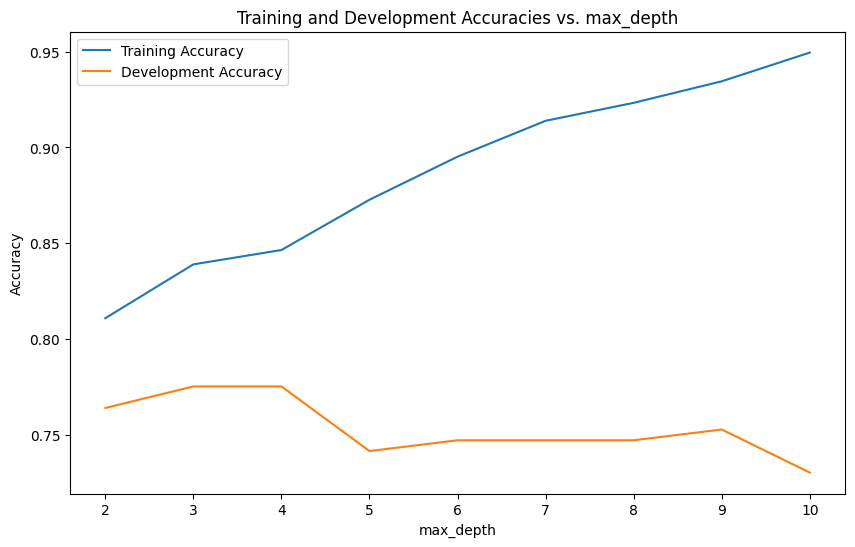

In [16]:
# Plot training and development accuracies
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), train_accuracies, label='Training Accuracy')
plt.plot(range(2, 11), dev_accuracies, label='Development Accuracy')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.title('Training and Development Accuracies vs. max_depth')
plt.legend()
plt.show()

High training accuracy and low development accuracy: the training accuracy is significantly higher than the development accuracy, it suggests that the model might be overfitting the training data. In other words, the model is capturing noise in the training data and fails to generalise well to unseen data.

In [17]:
# Report the accuracy of the final model on the test data
final_clf = DecisionTreeClassifier(max_depth=5) # Assuming max_depth=5 is chosen based on dev set performance
final_clf.fit(X_train, y_train)
y_test_pred = final_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on the test set with final model: {test_accuracy}")

Accuracy on the test set with final model: 0.7430167597765364
